In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
spam_df=pd.read_csv('C:/Users/piyush/Downloads/emails.csv')

In [3]:
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [5]:
spam_df['text'][5622]

'Subject: confirmation of your order  this is an automatic confirmation of the order you have placed using it  central .  request number : ecth - 4 rstt 6  order for : vince j kaminski  1 x ( option : 128 mb upgrade for deskpro en 6600 $ 129 )  1 x ( standard desktop $ 1262 ) enron it purchasing'

In [6]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [7]:
spam_df.tail(10)

,text,spam
5718,"Subject: altos na gas model kim , i know you ...",0
5719,Subject: power market research i came across ...,0
5720,Subject: re : visit to houston fyi - - - - -...,0
5721,Subject: ees risk management presentations for...,0
5722,Subject: re : vacation vince : i just found ...,0
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Visualize the Data


In [10]:
ham=spam_df[spam_df['spam']==0]

In [11]:
spam=spam_df[spam_df['spam']==1]

In [12]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [14]:
print('Spam Percentage =',(len(spam)/len(spam_df))*100,'%')

Spam Percentage = 23.88268156424581 %


In [15]:
print('Ham Percentage =',(len(ham)/len(spam_df))*100,'%')

Ham Percentage = 76.11731843575419 %


## Applying CountVectorizer to our Spam Ham Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(spam_df['text'])

In [17]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [18]:
spamham_countVectorizer.shape

(5728, 37303)

## Dividing the Cell for Training and Testing 

In [19]:
label=spam_df['spam']
X=spamham_countVectorizer
y=label

In [20]:
X.shape

(5728, 37303)

In [21]:
y.shape

(5728,)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

## Evaluating The Model 

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
y_predict_train[2]

0

In [28]:
cm=confusion_matrix(y_train,y_predict_train)

<Axes: >

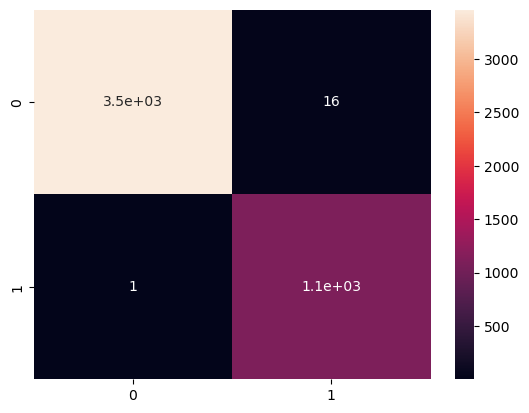

In [29]:
sns.heatmap(cm,annot=True)

In [30]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
cm=confusion_matrix(y_test,y_predict_test)


<Axes: >

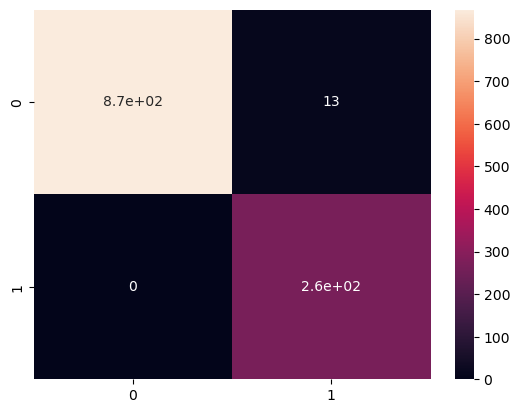

In [32]:
sns.heatmap(cm,annot=True)

In [33]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       881
           1       0.95      1.00      0.98       265

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



In [34]:
joblib.dump(NB_classifier, 'spam_classifier_model.pkl')

['spam_classifier_model.pkl']

In [35]:
joblib.dump(vectorizer, 'count_vectorizer.pkl')

['count_vectorizer.pkl']

In [1]:
import tkinter as tk
from tkinter import ttk
from sklearn.feature_extraction.text import CountVectorizer
from tkinter import ttk, scrolledtext
from sklearn.naive_bayes import MultinomialNB
import joblib

vectorizer = joblib.load('count_vectorizer.pkl')
model = joblib.load('spam_classifier_model.pkl')

def classify_text():
    text = text_entry.get("1.0", tk.END)
    text_vectorized = vectorizer.transform([text])
    prediction = model.predict(text_vectorized)[0]
    if prediction == 1:
        result_label.config(text='Spam')
    else:
        result_label.config(text='Ham')

root = tk.Tk()
root.title("Spam Detection")
root.geometry('800x500')

style = ttk.Style()
style.configure('TButton', font=('Arial', 12))
style.configure('TLabel', font=('Arial', 14))

label = tk.Label(root, text="Enter Message:")
label.pack(pady=10)

text_entry = scrolledtext.ScrolledText(root, width=70, height=10, wrap=tk.WORD)
text_entry.pack(pady=10)

classify_button = tk.Button(root, text="Classify", command=classify_text,bg="green", fg="white")
classify_button.pack(pady=10)

result_label = tk.Label(root, text="" , foreground='black')
result_label.pack(pady=10)

root.mainloop()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Separate features and target variable
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier instance for classification
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)